In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import distributions as dist

In [2]:
n = 100
x_train = dist.uniform(0, 20).rvs(n)
#x = x[np.argmax(x)]
y_true = 4 + 0.5 * x_train
y_obs = y_true + dist.norm(0, 0.5).rvs(n)

In [3]:
X = np.c_[np.ones(n), x_train]

In [4]:
# generate parameters, using least squares regression equation
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs)

In [5]:
σ = (1/n)*((y_obs - X.dot(θ)).T.dot(y_obs - X.dot(θ)))
σ

0.22618073251712825

In [6]:
x_test = dist.uniform(20, 25).rvs(n)

In [7]:
wz = dist.norm(X.dot(θ), σ).rvs(n)

In [8]:
X_test = np.c_[np.ones(n), x_test]
sd = dist.norm(X_test.dot(θ), σ).rvs(n)

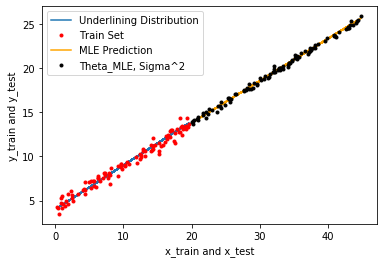

In [9]:
plt.plot(x_train, y_true, label='Underlining Distribution')
plt.plot(x_train, y_obs, '.', color='r', label='Train Set')
plt.plot(x_test, θ[0] + θ[1]*x_test, color='orange', label='MLE Prediction')
plt.plot(x_test, sd, '.', color='black', label='Theta_MLE, Sigma^2')
plt.legend()
plt.xlabel('x_train and x_test')
plt.ylabel('y_train and y_test')
plt.show()